In [114]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
type(dateparse)

function

In [117]:
time_1 = pd.read_csv("/content/drive/MyDrive/case_time_series.csv",
                   parse_dates=['Date_YMD'], index_col='Date_YMD',
                   date_parser=dateparse)
time_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2020-01-30,30 January 2020,1,1,0,0,0,0
2020-01-31,31 January 2020,0,1,0,0,0,0
2020-02-01,1 February 2020,0,1,0,0,0,0
2020-02-02,2 February 2020,1,2,0,0,0,0
2020-02-03,3 February 2020,1,3,0,0,0,0


In [118]:
time_1.loc['2020-03-01']

Date               1 March 2020
Daily Confirmed               0
Total Confirmed               3
Daily Recovered               0
Total Recovered               3
Daily Deceased                0
Total Deceased                0
Name: 2020-03-01 00:00:00, dtype: object

In [119]:
time_1.iloc[92]

Date               1 May 2020
Daily Confirmed          2396
Total Confirmed         37262
Daily Recovered           962
Total Recovered         10021
Daily Deceased             77
Total Deceased           1231
Name: 2020-05-01 00:00:00, dtype: object

In [120]:
time=time_1.iloc[92:,:]

In [121]:
time.shape

(356, 7)

In [122]:
time.iloc[304]

Date               1 March 2021
Daily Confirmed           12270
Total Confirmed        11124248
Daily Recovered           12472
Total Recovered        10796873
Daily Deceased               92
Total Deceased           156695
Name: 2021-03-01 00:00:00, dtype: object

In [123]:
daily_recovered_df=time['Total Recovered']

In [124]:
daily_recovered_df.shape

(356,)

In [125]:
daily_recovered_df[335]

11522718

In [126]:
daily_recovered_df.describe()

count    3.560000e+02
mean     6.081703e+06
std      4.429941e+06
min      1.002100e+04
25%      1.013338e+06
50%      7.166982e+06
75%      1.030390e+07
max      1.344926e+07
Name: Total Recovered, dtype: float64

In [127]:
daily_recovered_df.head()

Date_YMD
2020-05-01    10021
2020-05-02    10852
2020-05-03    11763
2020-05-04    12845
2020-05-05    14140
Name: Total Recovered, dtype: int64

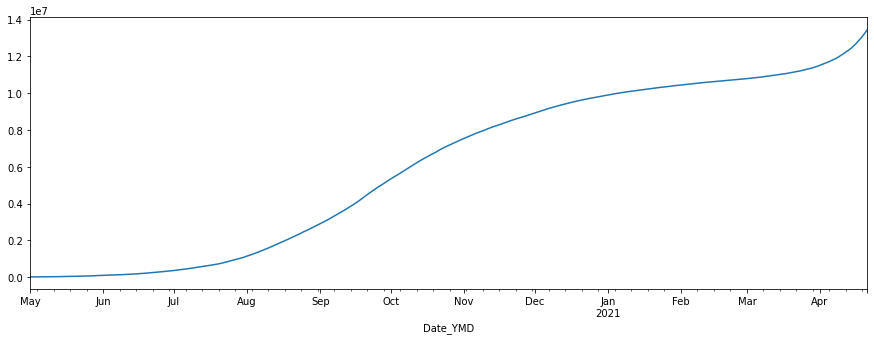

In [128]:
daily_recovered_df.plot(kind="line",figsize=(15,5))
plt.show()

In [129]:
daily_recovered_df.shape 

(356,)

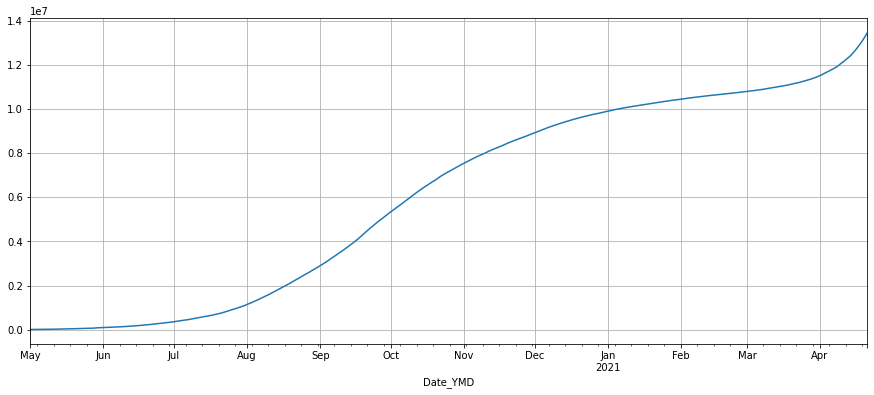

In [130]:
daily_recovered_df.plot(grid=True) #Overall slight upward trend

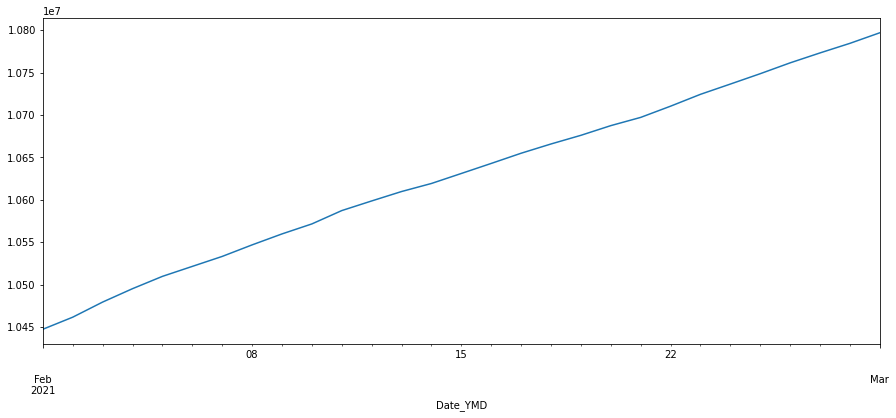

In [131]:
#analysing 2 months data
from datetime import datetime
start=datetime(2021,2,1)
end=datetime(2021,3,1)
daily_recovered_df[(start<=daily_recovered_df.index) & (daily_recovered_df.index<=end)].plot()

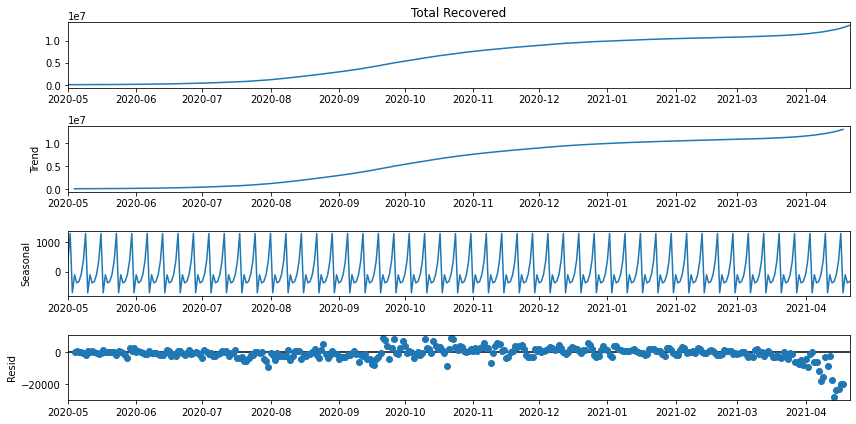

In [132]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_recovered_df,model='additive')
from pylab import rcParams
rcParams['figure.figsize'] = 12,6
fig=decomposition.plot()

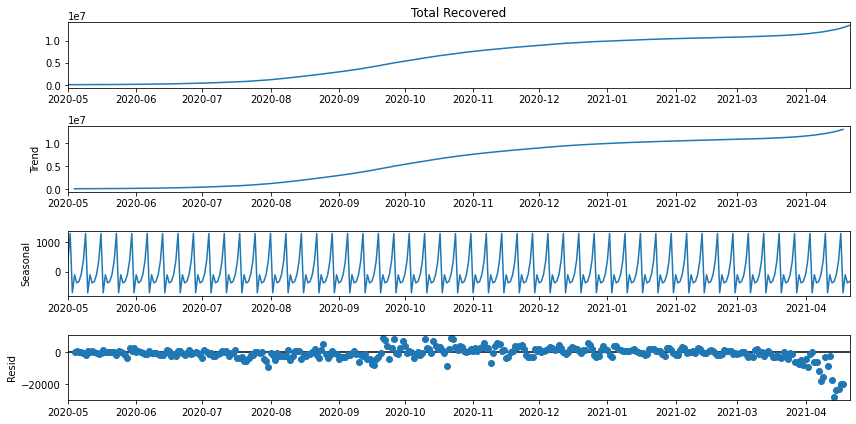

In [133]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_recovered_df,model='Multiplicative')
fig=decomposition.plot()

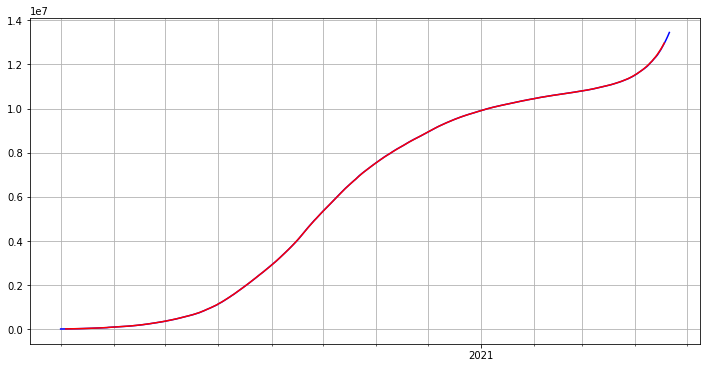

In [134]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(daily_recovered_df.index, daily_recovered_df, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [135]:
daily_recovered_df.shape

(356,)

In [136]:
train=daily_recovered_df[20:336] 
test=daily_recovered_df[336:]

In [137]:
train.tail()

Date_YMD
2021-03-28    11353680
2021-03-29    11390669
2021-03-30    11431911
2021-03-31    11472334
2021-04-01    11522718
Name: Total Recovered, dtype: int64

In [138]:
test.tail()

Date_YMD
2021-04-17    12804981
2021-04-18    12948820
2021-04-19    13103177
2021-04-20    13269833
2021-04-21    13449260
Name: Total Recovered, dtype: int64

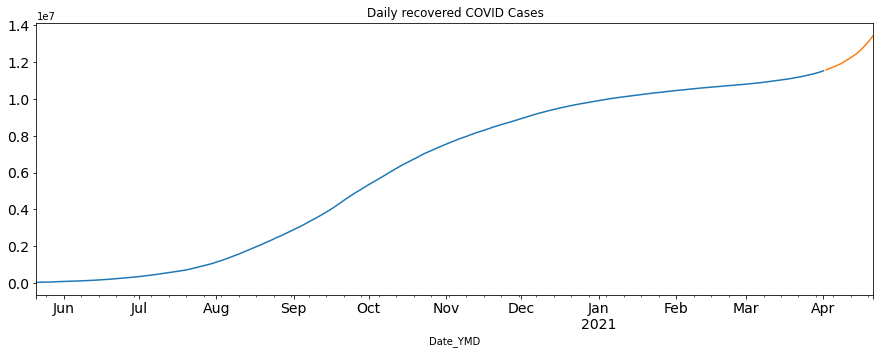

In [139]:
train.plot(figsize=(15,5), title= 'Daily recovered COVID Cases', fontsize=14)
test.plot(figsize=(15,5), title= 'Daily recovered COVID Cases', fontsize=14)
plt.show()

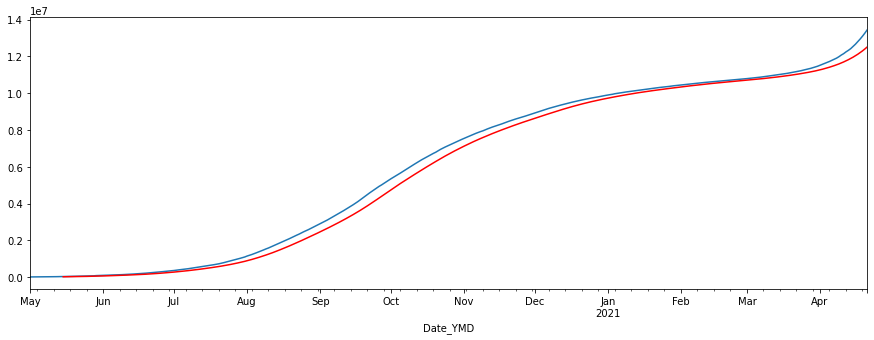

In [140]:

moving_avg =daily_recovered_df.rolling(15).mean()
daily_recovered_df.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

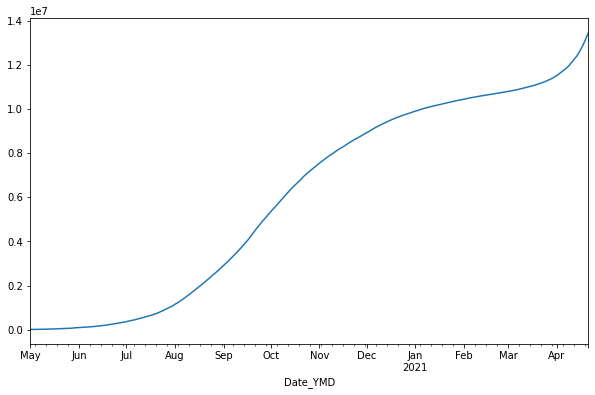

In [141]:
daily_recovered_df.plot(kind="line",figsize=(10,6))

In [142]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [143]:
#SimpleExpSmoothing is used when data doesnt follow trend and seasonality
train= train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(62)
ses.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Total Recovered,No. Observations:,316
Model:,SimpleExpSmoothing,SSE,623508664322.925
Optimized:,True,AIC,6767.312
Trend:,None,BIC,6774.824
Seasonal:,None,AICC,6767.441
Seasonal Periods:,None,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,13:30:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
initial_level,48553.000,l.0,True


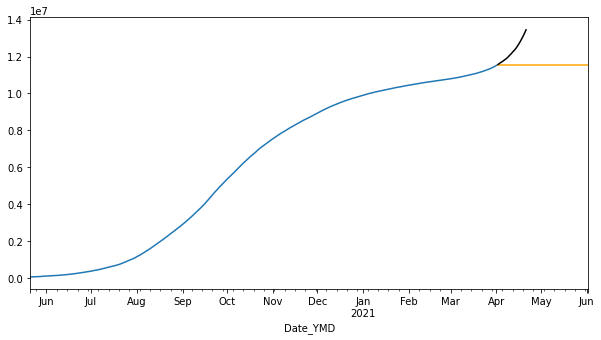

In [144]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [145]:
hes = ExponentialSmoothing(train, trend='mul').fit()
hes.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


Dep. Variable:,Total Recovered,No. Observations:,316
Model:,ExponentialSmoothing,SSE,4931143338.322
Optimized:,True,AIC,5241.938
Trend:,Multiplicative,BIC,5256.961
Seasonal:,None,AICC,5242.210
Seasonal Periods:,None,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,13:30:07
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.8771429,alpha,True
smoothing_trend,0.7236429,beta,True


In [146]:
hes1 = hes.forecast(62)

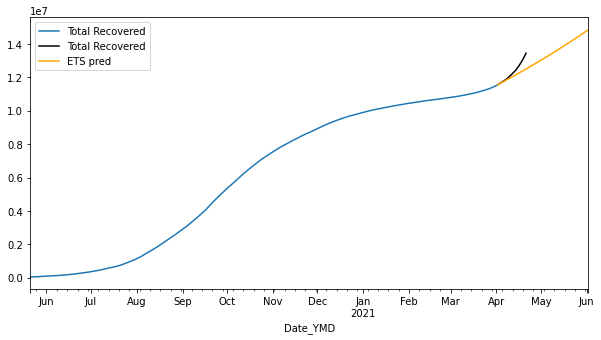

In [147]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [148]:
hwes = ExponentialSmoothing(train, seasonal_periods=3,trend='mul', seasonal="Multiplicative").fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [149]:
hwes = hwes.forecast(50)
print(hwes)

2021-04-02    1.156549e+07
2021-04-03    1.161291e+07
2021-04-04    1.165869e+07
2021-04-05    1.170517e+07
2021-04-06    1.175316e+07
2021-04-07    1.179949e+07
2021-04-08    1.184653e+07
2021-04-09    1.189511e+07
2021-04-10    1.194199e+07
2021-04-11    1.198960e+07
2021-04-12    1.203876e+07
2021-04-13    1.208621e+07
2021-04-14    1.213440e+07
2021-04-15    1.218416e+07
2021-04-16    1.223218e+07
2021-04-17    1.228095e+07
2021-04-18    1.233130e+07
2021-04-19    1.237991e+07
2021-04-20    1.242927e+07
2021-04-21    1.248023e+07
2021-04-22    1.252942e+07
2021-04-23    1.257937e+07
2021-04-24    1.263095e+07
2021-04-25    1.268074e+07
2021-04-26    1.273130e+07
2021-04-27    1.278350e+07
2021-04-28    1.283388e+07
2021-04-29    1.288505e+07
2021-04-30    1.293788e+07
2021-05-01    1.298888e+07
2021-05-02    1.304067e+07
2021-05-03    1.309414e+07
2021-05-04    1.314575e+07
2021-05-05    1.319816e+07
2021-05-06    1.325227e+07
2021-05-07    1.330451e+07
2021-05-08    1.335755e+07
2

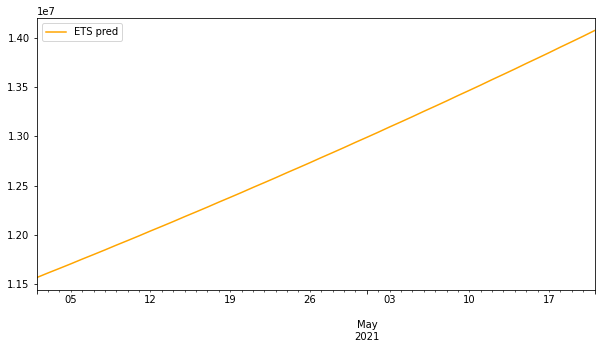

In [150]:
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

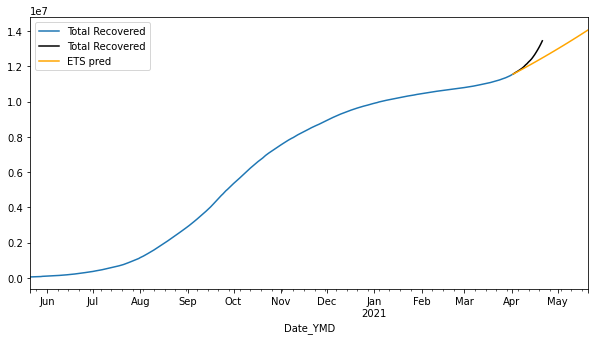

In [151]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [152]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

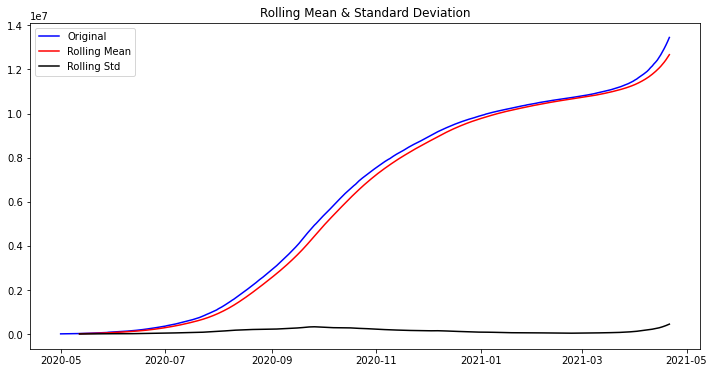

Results of Dickey-Fuller Test:
Test Statistic                   2.084640
p-value                          0.998773
#Lags Used                      13.000000
Number of Observations Used    342.000000
Critical Value (1%)             -3.449616
Critical Value (5%)             -2.870028
Critical Value (10%)            -2.571292
dtype: float64


In [153]:
test_stationarity(daily_recovered_df)

In [154]:
diff1=train.diff()
diff1=diff1.dropna()

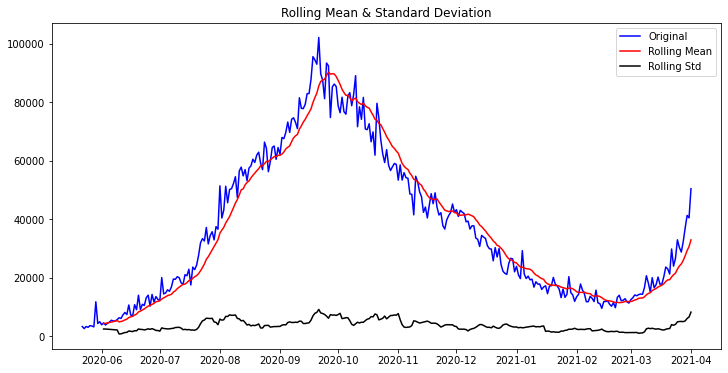

Results of Dickey-Fuller Test:
Test Statistic                  -1.938243
p-value                          0.314290
#Lags Used                      14.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [155]:
test_stationarity(diff1)

In [156]:
diff2=diff1.diff()
diff2=diff2.dropna()

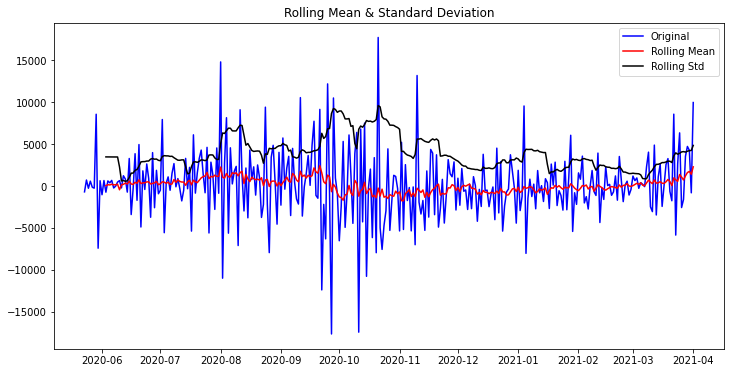

Results of Dickey-Fuller Test:
Test Statistic                  -1.990022
p-value                          0.290965
#Lags Used                      13.000000
Number of Observations Used    300.000000
Critical Value (1%)             -3.452337
Critical Value (5%)             -2.871223
Critical Value (10%)            -2.571929
dtype: float64


In [157]:
test_stationarity(diff2)

In [158]:
#Autocorelation and partial auto-corelation

In [159]:
from statsmodels.tsa.stattools import acf, pacf

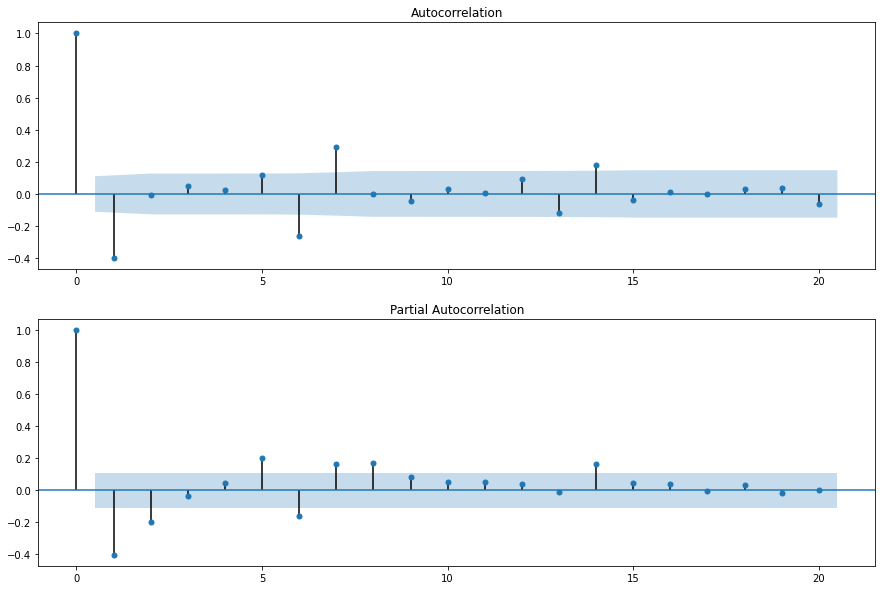

In [160]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=20)
pyplot.show()

In [161]:
!pip install pmdarima

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[6]             : AIC=6547.435, Time=0.22 sec
 ARIMA(1,2,0)(1,2,0)[6]             : AIC=6314.612, Time=0.24 sec
 ARIMA(0,2,1)(0,2,1)[6]             : AIC=inf, Time=1.67 sec
 ARIMA(1,2,0)(0,2,0)[6]             : AIC=6468.864, Time=0.12 sec
 ARIMA(1,2,0)(2,2,0)[6]             : AIC=6138.291, Time=2.05 sec
 ARIMA(1,2,0)(2,2,1)[6]             : AIC=inf, Time=2.98 sec
 ARIMA(1,2,0)(1,2,1)[6]             : AIC=inf, Time=1.70 sec
 ARIMA(0,2,0)(2,2,0)[6]             : AIC=6191.994, Time=0.34 sec
 ARIMA(2,2,0)(2,2,0)[6]             : AIC=6106.590, Time=2.24 sec
 ARIMA(2,2,0)(1,2,0)[6]             : AIC=6279.077, Time=0.39 sec
 ARIMA(2,2,0)(2,2,1)[6]             : AIC=inf, Time=3.99 sec
 ARIMA(2,2,0)(1,2,1)[6]             : AIC=inf, Time=1.63 sec
 ARIMA(3,2,0)(2,2,0)[6]             : AIC=6222.032, Time=0.80 sec
 ARIMA(2,2,1)(2,2,0)[6]             : AIC=inf, Time=3.10 sec
 ARIMA(1,2,1)(2,2,0)[6]             : AIC=6096.797, Time=4.43 s

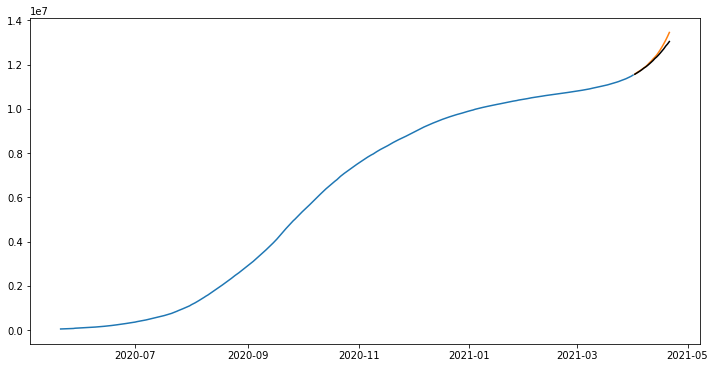

In [162]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=6,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [163]:
print(model.summary()) 

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  316
Model:             SARIMAX(0, 2, 1)x(2, 2, [], 6)   Log Likelihood               -3043.608
Date:                            Sun, 25 Apr 2021   AIC                           6095.216
Time:                                    13:31:06   BIC                           6110.058
Sample:                                         0   HQIC                          6101.154
                                            - 316                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6579      0.034    -19.300      0.000      -0.725      -0.591
ar.S.L6       -1.0735      0.031   

In [164]:
from statsmodels.tsa.arima_model import ARIMA

In [165]:
model = ARIMA(train, order=(2,2,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:     D2.Total Recovered   No. Observations:                  314
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -3033.819
Method:                       css-mle   S.D. of innovations           3798.965
Date:                Sun, 25 Apr 2021   AIC                           6075.637
Time:                        13:31:06   BIC                           6090.635
Sample:                    05-23-2020   HQIC                          6081.630
                         - 04-01-2021                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      138.5961    127.019      1.091      0.275    -110.356     387.548
ar.L1.D2.Total Recovered    -0.4876      0.056     -8.752      0.000      -0.597      -0.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be use

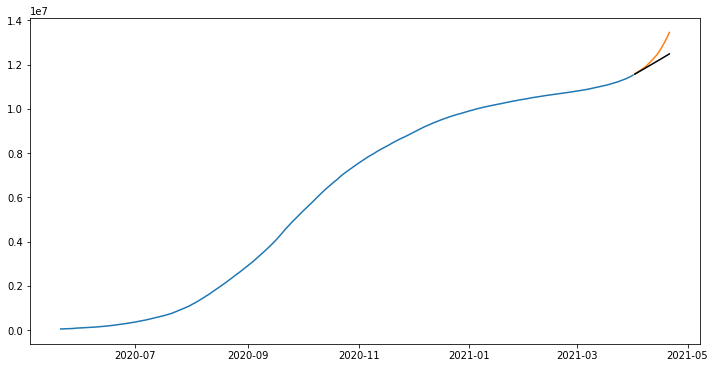

In [166]:
forecast = model_fit.forecast(steps=20)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [168]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

287941.07853046694


In [169]:
#ARIMA model gave best results.